In [1]:
# Adds link to the scripts folder
import sys
import os
sys.path.append("../scripts/")
import matplotlib.pyplot as plt
import numpy as np

from trajectory import Trajectory, create_trajectory_list, filter, create_all_patient_trajectories
from hivevo.patients import Patient
import filenames
import copy

# Mean frequency over time

In [2]:
def get_mean_in_time(trajectories, nb_bins=15, freq_range=[0.4, 0.6]):
    """
    Computes the mean frequency in time of a set of trajectories from the point they are seen in the freq_range window.
    Returns the middle of the time bins and the computed frequency mean.
    """
    # Create bins and select trajectories going through the freq_range
    time_bins = np.linspace(-1000, 2000, nb_bins)
    trajectories = [traj for traj in trajectories if np.sum(np.logical_and(
        traj.frequencies >= freq_range[0], traj.frequencies < freq_range[1]), dtype=bool)]

    # Offset trajectories to set t=0 at the point they are seen in the freq_range and adds all the frequencies / times
    # to arrays for later computation of mean
    t_traj = np.array([])
    f_traj = np.array([])
    for traj in trajectories:
        idx = np.where(np.logical_and(traj.frequencies >=
                                      freq_range[0], traj.frequencies < freq_range[1]))[0][0]
        traj.t = traj.t - traj.t[idx]
        t_traj = np.concatenate((t_traj, traj.t))
        f_traj = np.concatenate((f_traj, traj.frequencies))

    # Binning of all the data in the time bins
    filtered_fixed = [traj for traj in trajectories if traj.fixation == "fixed"]
    filtered_lost = [traj for traj in trajectories if traj.fixation == "lost"]
    freqs, fixed, lost = [], [], []
    for ii in range(len(time_bins) - 1):
        freqs = freqs + [f_traj[np.logical_and(t_traj >= time_bins[ii], t_traj < time_bins[ii + 1])]]
        fixed = fixed + [len([traj for traj in filtered_fixed if traj.t[-1] < time_bins[ii]])]
        lost = lost + [len([traj for traj in filtered_lost if traj.t[-1] < time_bins[ii]])]

    # Computation of the mean in each bin, active trajectories contribute their current frequency,
    # fixed contribute 1 and lost contribute 0
    mean = []
    for ii in range(len(freqs)):
        mean = mean + [np.sum(freqs[ii]) + fixed[ii]]
        mean[-1] /= (len(freqs[ii]) + fixed[ii] + lost[ii])

    return 0.5 * (time_bins[1:] + time_bins[:-1]), mean

## Region env

In [22]:
patient_names = ["p1", "p2", "p3", "p4", "p5", "p6", "p8", "p9", "p11"]
region = "env"
nb_bins = 15
fontsize = 16

trajectories = create_all_patient_trajectories(region, patient_names)
syn_traj = copy.deepcopy([traj for traj in trajectories if traj.synonymous == True])
non_syn_traj = copy.deepcopy([traj for traj in trajectories if traj.synonymous == False])

freq_range = [0.2, 0.4]
time_bins, mean_syn1 = get_mean_in_time(syn_traj, nb_bins, freq_range)
time_bins, mean_non_syn1 = get_mean_in_time(non_syn_traj, nb_bins, freq_range)

freq_range = [0.4, 0.6]
time_bins, mean_syn2 = get_mean_in_time(syn_traj, nb_bins, freq_range)
time_bins, mean_non_syn2 = get_mean_in_time(non_syn_traj, nb_bins, freq_range)

freq_range = [0.6, 0.8]
time_bins, mean_syn3 = get_mean_in_time(syn_traj, nb_bins, freq_range)
time_bins, mean_non_syn3 = get_mean_in_time(non_syn_traj, nb_bins, freq_range)

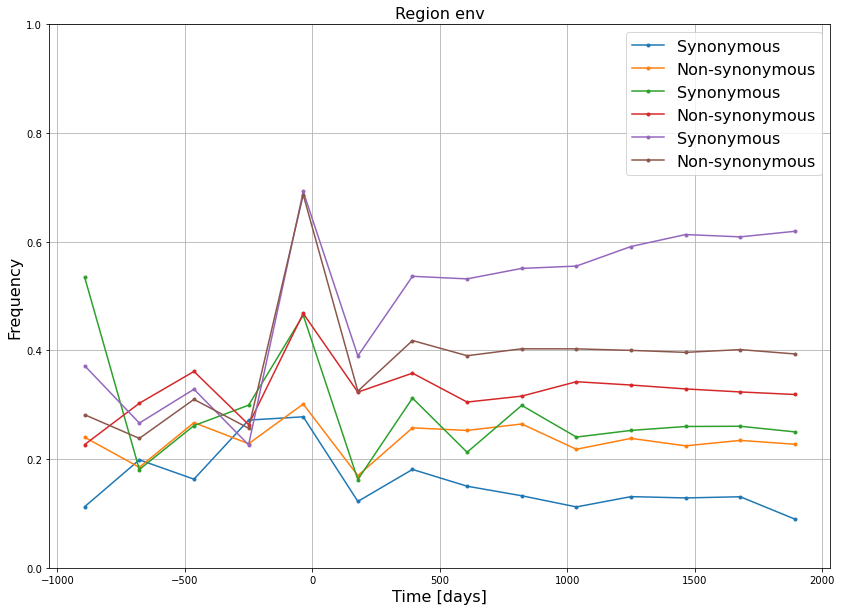

In [23]:
plt.figure(figsize=(14,10))
plt.plot(time_bins, mean_syn1, '.-', label="Synonymous")
plt.plot(time_bins, mean_non_syn1, '.-', label="Non-synonymous")
plt.plot(time_bins, mean_syn2, '.-', label="Synonymous")
plt.plot(time_bins, mean_non_syn2, '.-', label="Non-synonymous")
plt.plot(time_bins, mean_syn3, '.-', label="Synonymous")
plt.plot(time_bins, mean_non_syn3, '.-', label="Non-synonymous")
plt.xlabel("Time [days]", fontsize=fontsize)
plt.ylabel("Frequency", fontsize=fontsize)
plt.legend(fontsize=fontsize)
plt.title(f"Region {region}", fontsize=fontsize)
plt.ylim([0,1])
plt.grid()
plt.show()

## Region pol

In [24]:
patient_names = ["p1", "p2", "p3", "p4", "p5", "p6", "p8", "p9", "p11"]
region = "pol"
nb_bins = 15
fontsize = 16

trajectories = create_all_patient_trajectories(region, patient_names)
syn_traj = copy.deepcopy([traj for traj in trajectories if traj.synonymous == True])
non_syn_traj = copy.deepcopy([traj for traj in trajectories if traj.synonymous == False])

freq_range = [0.2, 0.4]
time_bins, mean_syn1 = get_mean_in_time(syn_traj, nb_bins, freq_range)
time_bins, mean_non_syn1 = get_mean_in_time(non_syn_traj, nb_bins, freq_range)

freq_range = [0.4, 0.6]
time_bins, mean_syn2 = get_mean_in_time(syn_traj, nb_bins, freq_range)
time_bins, mean_non_syn2 = get_mean_in_time(non_syn_traj, nb_bins, freq_range)

freq_range = [0.6, 0.8]
time_bins, mean_syn3 = get_mean_in_time(syn_traj, nb_bins, freq_range)
time_bins, mean_non_syn3 = get_mean_in_time(non_syn_traj, nb_bins, freq_range)

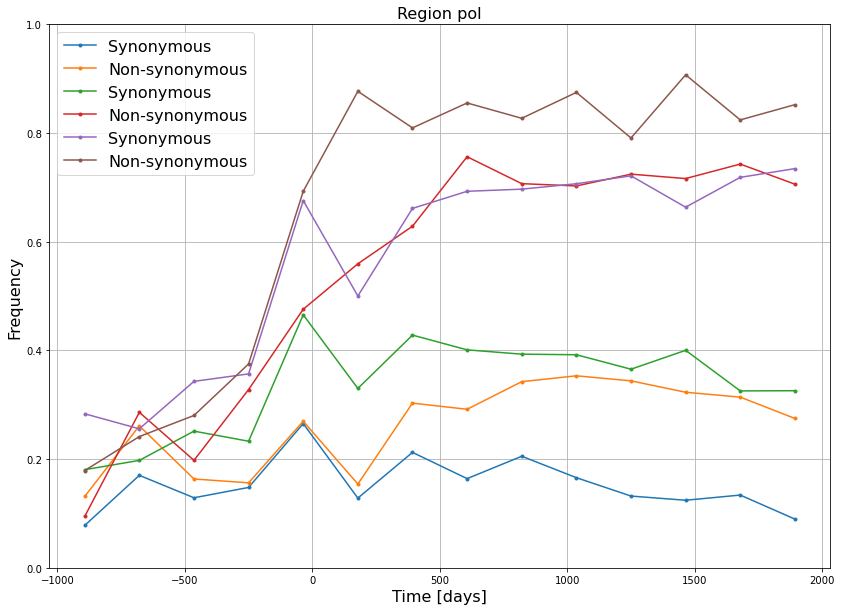

In [25]:
plt.figure(figsize=(14,10))
plt.plot(time_bins, mean_syn1, '.-', label="Synonymous")
plt.plot(time_bins, mean_non_syn1, '.-', label="Non-synonymous")
plt.plot(time_bins, mean_syn2, '.-', label="Synonymous")
plt.plot(time_bins, mean_non_syn2, '.-', label="Non-synonymous")
plt.plot(time_bins, mean_syn3, '.-', label="Synonymous")
plt.plot(time_bins, mean_non_syn3, '.-', label="Non-synonymous")
plt.xlabel("Time [days]", fontsize=fontsize)
plt.ylabel("Frequency", fontsize=fontsize)
plt.legend(fontsize=fontsize)
plt.title(f"Region {region}", fontsize=fontsize)
plt.ylim([0,1])
plt.grid()
plt.show()

## Region gag

In [26]:
patient_names = ["p1", "p2", "p3", "p4", "p5", "p6", "p8", "p9", "p11"]
region = "gag"
nb_bins = 15
fontsize = 16

trajectories = create_all_patient_trajectories(region, patient_names)
syn_traj = copy.deepcopy([traj for traj in trajectories if traj.synonymous == True])
non_syn_traj = copy.deepcopy([traj for traj in trajectories if traj.synonymous == False])

freq_range = [0.2, 0.4]
time_bins, mean_syn1 = get_mean_in_time(syn_traj, nb_bins, freq_range)
time_bins, mean_non_syn1 = get_mean_in_time(non_syn_traj, nb_bins, freq_range)

freq_range = [0.4, 0.6]
time_bins, mean_syn2 = get_mean_in_time(syn_traj, nb_bins, freq_range)
time_bins, mean_non_syn2 = get_mean_in_time(non_syn_traj, nb_bins, freq_range)

freq_range = [0.6, 0.8]
time_bins, mean_syn3 = get_mean_in_time(syn_traj, nb_bins, freq_range)
time_bins, mean_non_syn3 = get_mean_in_time(non_syn_traj, nb_bins, freq_range)

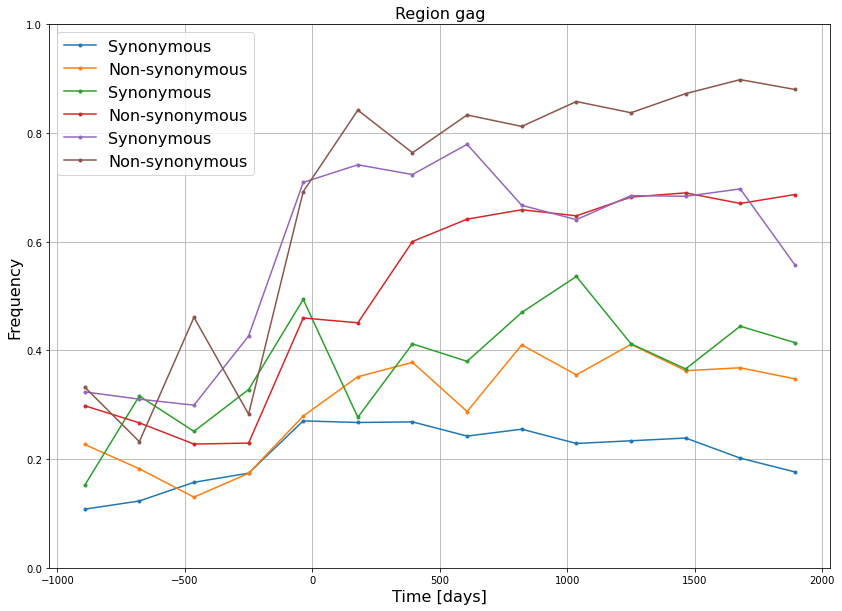

In [27]:
plt.figure(figsize=(14,10))
plt.plot(time_bins, mean_syn1, '.-', label="Synonymous")
plt.plot(time_bins, mean_non_syn1, '.-', label="Non-synonymous")
plt.plot(time_bins, mean_syn2, '.-', label="Synonymous")
plt.plot(time_bins, mean_non_syn2, '.-', label="Non-synonymous")
plt.plot(time_bins, mean_syn3, '.-', label="Synonymous")
plt.plot(time_bins, mean_non_syn3, '.-', label="Non-synonymous")
plt.xlabel("Time [days]", fontsize=fontsize)
plt.ylabel("Frequency", fontsize=fontsize)
plt.legend(fontsize=fontsize)
plt.title(f"Region {region}", fontsize=fontsize)
plt.ylim([0,1])
plt.grid()
plt.show()

## Comparison between regions

In [36]:
patient_names = ["p1", "p2", "p3", "p4", "p5", "p6", "p8", "p9", "p11"]
freq_range = [0.4, 0.5]
nb_bins = 15
fontsize = 16

region = "env"
trajectories = create_all_patient_trajectories(region, patient_names)
syn_traj = copy.deepcopy([traj for traj in trajectories if traj.synonymous == True])
non_syn_traj = copy.deepcopy([traj for traj in trajectories if traj.synonymous == False])
time_bins, mean_syn1 = get_mean_in_time(syn_traj, nb_bins, freq_range)
time_bins, mean_non_syn1 = get_mean_in_time(non_syn_traj, nb_bins, freq_range)

region = "gag"
trajectories = create_all_patient_trajectories(region, patient_names)
syn_traj = copy.deepcopy([traj for traj in trajectories if traj.synonymous == True])
non_syn_traj = copy.deepcopy([traj for traj in trajectories if traj.synonymous == False])
time_bins, mean_syn2 = get_mean_in_time(syn_traj, nb_bins, freq_range)
time_bins, mean_non_syn2 = get_mean_in_time(non_syn_traj, nb_bins, freq_range)

region = "pol"
trajectories = create_all_patient_trajectories(region, patient_names)
syn_traj = copy.deepcopy([traj for traj in trajectories if traj.synonymous == True])
non_syn_traj = copy.deepcopy([traj for traj in trajectories if traj.synonymous == False])
time_bins, mean_syn3 = get_mean_in_time(syn_traj, nb_bins, freq_range)
time_bins, mean_non_syn3 = get_mean_in_time(non_syn_traj, nb_bins, freq_range)

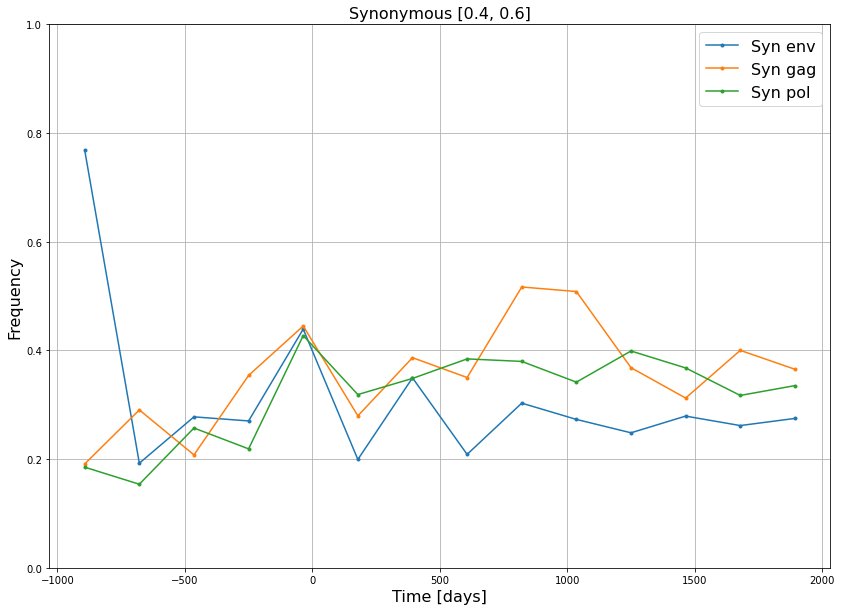

In [37]:
plt.figure(figsize=(14,10))
plt.plot(time_bins, mean_syn1, '.-', label="Syn env")
plt.plot(time_bins, mean_syn2, '.-', label="Syn gag")
plt.plot(time_bins, mean_syn3, '.-', label="Syn pol")
plt.xlabel("Time [days]", fontsize=fontsize)
plt.ylabel("Frequency", fontsize=fontsize)
plt.legend(fontsize=fontsize)
plt.title(f"Synonymous [0.4, 0.6]", fontsize=fontsize)
plt.ylim([0,1])
plt.grid()
plt.show()

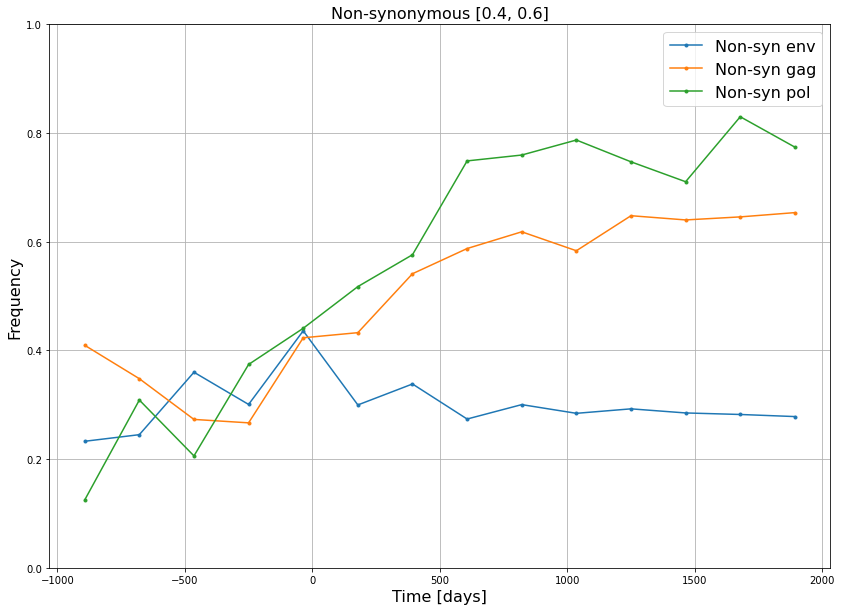

In [38]:
plt.figure(figsize=(14,10))
plt.plot(time_bins, mean_non_syn1, '.-', label="Non-syn env")
plt.plot(time_bins, mean_non_syn2, '.-', label="Non-syn gag")
plt.plot(time_bins, mean_non_syn3, '.-', label="Non-syn pol")
plt.xlabel("Time [days]", fontsize=fontsize)
plt.ylabel("Frequency", fontsize=fontsize)
plt.legend(fontsize=fontsize)
plt.title(f"Non-synonymous [0.4, 0.6]", fontsize=fontsize)
plt.ylim([0,1])
plt.grid()
plt.show()